## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [105]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [106]:
import requests
response = requests.get(target_url)#抓網頁
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [107]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag ='\n' 

data = data.split(split_tag)
data2=data
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [108]:
import pandas as pd
data = []
with open("D:/Marchine learning/D5/fromlab.txt", 'r',encoding="utf-8") as f:
    for line in f:
        line = line.replace('\n', '').split('\t') # 將每句最後的 /n 取代成空值後，再以逗號斷句
        data.append(line)
    
df = pd.DataFrame(data)
df.head()

,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


In [109]:
def split_data(data2):
    name=[]
    url=[]
    for i in data2:
        name.append(i.split("\t")[0])
        try:    
            url.append(i.split("\t")[1])
        except :
            url.append("")
    data_dict = {'name': name,
                'url':url}
    return data_dict

In [110]:
data2=split_data(data2)
df_data = pd.DataFrame(data2)
df_data.head()

,name,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


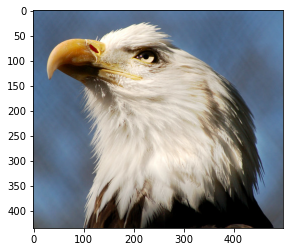

In [85]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0][1]
print(df.loc[0][1])
response = requests.get(first_link)
img = Image.open(BytesIO(response.content)) #因為圖片是一個 byte 儲存的檔案，要用這種型態才可以讀取，否則會看到一堆亂碼。

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [86]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    
    img_list=[]
    for url in url_list:
        response = requests.get(url)
        try:                                         #https://pydoing.blogspot.com/2011/01/python-try.html
            img=Image.open(BytesIO(response.content))#把可能會產生例外的程式碼放在 try 之後的程式區塊 (block) 
        except :                                     #except 則放例外發生時的處置
            pass
        else:
            img_list.append(img)                      # else 後的程式區塊放的是沒有發生例外，程式所執行的工作
    return img_list

['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'
 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'
 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg'
 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg'
 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg']
Total images that we got: 4 


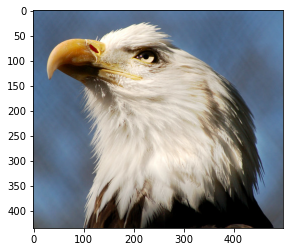

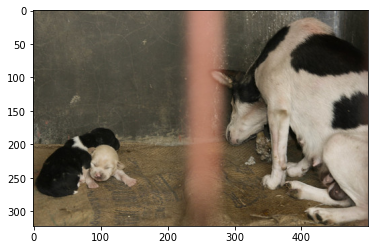

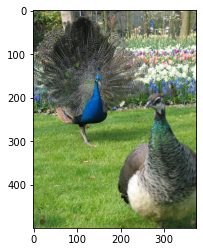

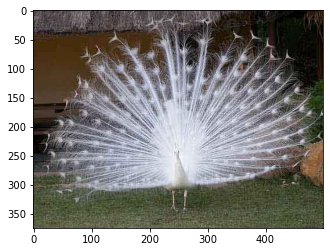

In [87]:
print(df[0:5][1].values)
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %d " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()